# Question 1. Implement LeNet on Cifar-100 dataset
1. Load the cifar 100 dataset. Use the 'coarse' labels.
https://www.tensorflow.org/api_docs/python/tf/keras/datasets/cifar100/load_data



In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets

In [ ]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar100.load_data(label_mode='coarse')
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

169001437/169001437 [==============================] - 2s 0us/step
(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


2. Check if there are 20 labels in y_train using np.unique().

In [ ]:
import numpy as np
np.unique(y_train)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

3. More information about the dataset could be found here : https://www.cs.toronto.edu/~kriz/cifar.html . Plot the first 25 images from both the train and test data.

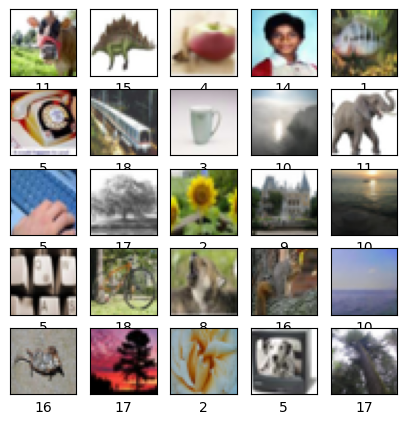

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i])
    plt.xlabel(y_train[i][0])
plt.show()

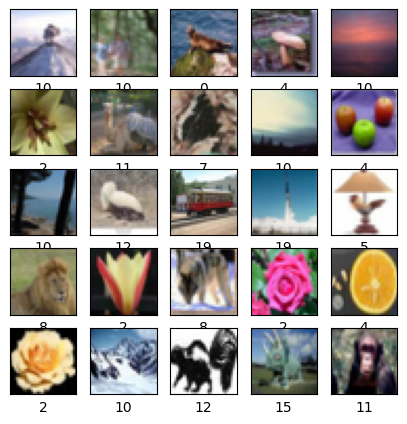

In [ ]:
plt.figure(figsize=(5,5))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_test[i])
    plt.xlabel(y_test[i][0])
plt.show()

4. Normalize the data

In [ ]:
x_train=X_train/255.0
x_test=X_test/255.0

### 5. LeNet

Since the images are of shape (32,32,3) , we can use LeNet architecture. The first difference is that the images are of RGB format and not grayscale.We just need to change the input shape for that.
The second difference is in the number of output classes.

Others remain same.

**Import layers and models from tensorflow.keras and build the LeNet architecture.**

In [ ]:
from tensorflow.keras import layers,models

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(6, (5, 5), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(16, (5, 5), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(120, activation='relu'))
model.add(layers.Dense(84, activation='relu'))
model.add(layers.Dense(20))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         456       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 6)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 16)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 400)               0         
                                                                 
 dense (Dense)               (None, 120)               4

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

%time history = model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 42s 26ms/step - loss: 2.5022 - accuracy: 0.2257
Epoch 2/10
1563/1563 [==============================] - 42s 27ms/step - loss: 2.1599 - accuracy: 0.3317
Epoch 3/10
1563/1563 [==============================] - 39s 25ms/step - loss: 2.0403 - accuracy: 0.3685
Epoch 4/10
1563/1563 [==============================] - 41s 26ms/step - loss: 1.9664 - accuracy: 0.3879
Epoch 5/10
1563/1563 [==============================] - 40s 26ms/step - loss: 1.9036 - accuracy: 0.4082
Epoch 6/10
1563/1563 [==============================] - 39s 25ms/step - loss: 1.8508 - accuracy: 0.4230
Epoch 7/10
1563/1563 [==============================] - 40s 25ms/step - loss: 1.8065 - accuracy: 0.4378
Epoch 8/10
1563/1563 [==============================] - 49s 31ms/step - loss: 1.7640 - accuracy: 0.4468
Epoch 9/10
1563/1563 [==============================] - 42s 27ms/step - loss: 1.7245 - accuracy: 0.4597
Epoch 10/10
1563/1563 [==============================] - 42s 27m

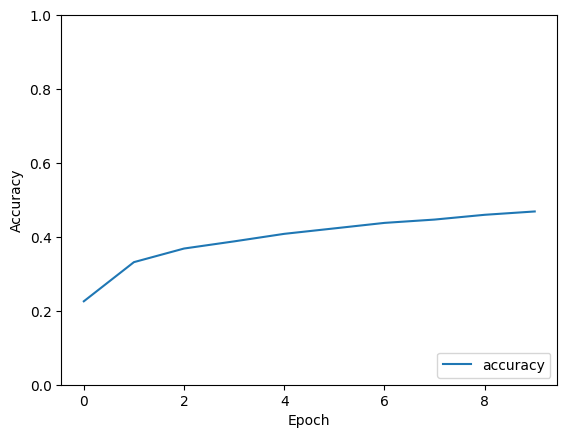

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(test_acc)

313/313 - 3s - loss: 1.9288 - accuracy: 0.4064 - 3s/epoch - 10ms/step
0.40639999508857727


It can be seen that the model couldn't achieve a good accuracy. We need to use better models for this task.

# Question 2 : Implement VGGNet - Part 1

Check this website : https://paperswithcode.com/sota/image-classification-on-cifar-100 . It contains information about the best performing models.

We can check the VGGNet-16 model. It consists of 16 layers with weights and some maxpooling layers. The architecture could be in the internet (even in the slides).

VGGNet works on images of size (224,224,3). However, we can implement it on (32,32,3). We will see both the approaches. First let's build VGGNet and train it on original image. Then, we will reshape our images from (32,32,3) to (224,224,3) and train VGGNet on them.

The layers are :

1. Conv layer : 64 kernels, 3x3 . strides = (1,1). activation =none. Batch Normalization. Relu Activation.
2. Conv layer : 64 kernels, 3x3 . strides = (1,1). activation =none. Batch Normalization. Relu Activation.
3. MaxPooling . kernel = 2x2. strides = (2,2).
4. Conv layer : 128 kernels, 3x3 . strides = (1,1). activation =none.
 Batch Normalization. Relu Activation.
5. Conv layer : 128 kernels, 3x3 . strides = (1,1). activation =none.
 Batch Normalization. Relu Activation.
6. MaxPooling . kernel = 2x2. strides = (2,2).
7. Conv layer : 256 kernels, 3x3 . strides = (1,1). activation =none.
 Batch Normalization. Relu Activation.
8. Conv layer : 256 kernels, 3x3 . strides = (1,1). activation =none.
 Batch Normalization. Relu Activation.
9. Conv layer : 256 kernels, 3x3 . strides = (1,1). activation =none.
 Batch Normalization. Relu Activation.
10. MaxPooling . kernel = 2x2. strides = (2,2).
11. Conv layer : 512 kernels, 3x3 . strides = (1,1). activation =none.
 Batch Normalization. Relu Activation.
12. Conv layer : 512 kernels, 3x3 . strides = (1,1). activation =none.
 Batch Normalization. Relu Activation.
13. Conv layer : 512 kernels, 3x3 . strides = (1,1). activation =none.
 Batch Normalization. Relu Activation.
14. MaxPooling . kernel = 2x2. strides = (2,2).
15. Flatten Layer.
16. Dense layer of 4096 neurons.
17. Dense layer of 1000 neurons.
18. Dense layer of 20 neurons.


I have omitted the last block of three conv layers of 512 kernels because the output sizes reduces to (1,1,512). You may include it and see.

In [ ]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Conv2D(64, (3, 3), padding='same', input_shape=(32,32,3)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.Conv2D(64, (3, 3), padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.MaxPooling2D((2, 2), strides=(2, 2)))

model.add(tf.keras.layers.Conv2D(128, (3, 3), padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.Conv2D(128, (3, 3), padding='same'))
model.add(tf.keras.layers.MaxPooling2D((2, 2), strides=(2, 2)))

model.add(tf.keras.layers.Conv2D(256, (3, 3), padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.Conv2D(256, (3, 3), padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.Conv2D(256, (3, 3), padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.MaxPooling2D((2, 2), strides=(2, 2)))

model.add(tf.keras.layers.Conv2D(512, (3, 3), padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.Conv2D(512, (3, 3), padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.Conv2D(512, (3, 3), padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.MaxPooling2D((2, 2), strides=(2, 2)))


# Final layers
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(4096))
model.add(tf.keras.layers.Dense(1000))
model.add(tf.keras.layers.Dense(20))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 32, 32, 64)        1792      
                                                                 
 batch_normalization_9 (Batc  (None, 32, 32, 64)       256       
 hNormalization)                                                 
                                                                 
 activation_9 (Activation)   (None, 32, 32, 64)        0         
                                                                 
 conv2d_11 (Conv2D)          (None, 32, 32, 64)        36928     
                                                                 
 batch_normalization_10 (Bat  (None, 32, 32, 64)       256       
 chNormalization)                                                
                                                                 
 activation_10 (Activation)  (None, 32, 32, 64)       

Once you are ready with the model, change runtime to GPU and then train the model, else it will take a lot of time to train it on CPU.

Compile the model using SparseCategoricalCrossentropy Loss Function and accuracy metric. Fit it on the train dataset. and evaluate on the test.

In [ ]:
model.compile(optimizer='adam',
          loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
          metrics=['accuracy'])

In [ ]:
model.fit(x_train,y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 42s 22ms/step - loss: 3.7516 - accuracy: 0.1115
Epoch 2/10
1563/1563 [==============================] - 34s 22ms/step - loss: 2.5150 - accuracy: 0.2138
Epoch 3/10
1563/1563 [==============================] - 35s 22ms/step - loss: 2.1674 - accuracy: 0.3232
Epoch 4/10
1563/1563 [==============================] - 37s 24ms/step - loss: 1.8979 - accuracy: 0.4028
Epoch 5/10
1563/1563 [==============================] - 36s 23ms/step - loss: 1.6744 - accuracy: 0.4692
Epoch 6/10
1563/1563 [==============================] - 34s 22ms/step - loss: 1.5064 - accuracy: 0.5205
Epoch 7/10
1563/1563 [==============================] - 34s 22ms/step - loss: 1.3730 - accuracy: 0.5638
Epoch 8/10
1563/1563 [==============================] - 35s 22ms/step - loss: 1.2174 - accuracy: 0.6092
Epoch 9/10
1563/1563 [==============================] - 36s 23ms/step - loss: 1.1163 - accuracy: 0.6409
Epoch 10/10
1563/1563 [==============================] - 35s 23m

In [ ]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 60s 7ms/step - loss: 1.5216 - accuracy: 0.5635


[1.5216360092163086, 0.5634999871253967]

### Somewhat better !!!

# Question 3 : Implement VGGNet - Part 3

Let's see how the image will look like when it gets resized. The cell already has output. But if you had mistakenly run it, you can correct it by verifying the variable names. The X_train here refers to the original image before normalization.

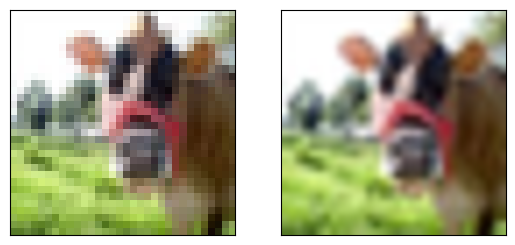

In [ ]:
import matplotlib.pyplot as plt
plt.subplot(121)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(X_train[0])

from PIL import Image
import numpy as np
pil_image = Image.fromarray(X_train[0])
pil_image = np.array(pil_image.resize((224,224)))
plt.subplot(122)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(pil_image)

To resize the dataset from (32,32,3) to (224,224,3) , you may try out defining a function. Then applying it on the whole dataset at once and store the output. However, you may run out of memory while doing so.

To counter that, we have a simple solution. tf.keras.layers.Resizing which will resize the image to shape (224,224) and then Rescaling to normalize the images if not done earlier. This method won't return error as model.fit process only a small batch at a time (default 32) and not thee whole dataset.


Now, start building the model for input image shape of (224,224,3).

Now, if you want to save some time, reduce the number of neurons in the dense layers.

In [ ]:
try:
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver()
    print('Device:', tpu.master())
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    strategy = tf.distribute.experimental.TPUStrategy(tpu)
except:
    strategy = tf.distribute.get_strategy()
print('Number of replicas:', strategy.num_replicas_in_sync)

Device: grpc://10.32.171.90:8470


Number of replicas: 8


In [ ]:
with strategy.scope():
  model = tf.keras.models.Sequential()
  model.add(tf.keras.layers.InputLayer(input_shape=(32,32,3)))
  model.add(tf.keras.layers.Resizing(224,224))
  model.add(tf.keras.layers.Rescaling(scale=1./255))
  model.add(tf.keras.layers.Conv2D(64, (3, 3), padding='same'))
  model.add(tf.keras.layers.BatchNormalization())
  model.add(tf.keras.layers.Activation('relu'))
  model.add(tf.keras.layers.Conv2D(64, (3, 3), padding='same'))
  model.add(tf.keras.layers.BatchNormalization())
  model.add(tf.keras.layers.Activation('relu'))
  model.add(tf.keras.layers.MaxPooling2D((2, 2), strides=(2, 2)))

  model.add(tf.keras.layers.Conv2D(128, (3, 3), padding='same'))
  model.add(tf.keras.layers.BatchNormalization())
  model.add(tf.keras.layers.Activation('relu'))
  model.add(tf.keras.layers.Conv2D(128, (3, 3), padding='same'))
  model.add(tf.keras.layers.MaxPooling2D((2, 2), strides=(2, 2)))

  model.add(tf.keras.layers.Conv2D(256, (3, 3), padding='same'))
  model.add(tf.keras.layers.BatchNormalization())
  model.add(tf.keras.layers.Activation('relu'))
  model.add(tf.keras.layers.Conv2D(256, (3, 3), padding='same'))
  model.add(tf.keras.layers.BatchNormalization())
  model.add(tf.keras.layers.Activation('relu'))
  model.add(tf.keras.layers.Conv2D(256, (3, 3), padding='same'))
  model.add(tf.keras.layers.BatchNormalization())
  model.add(tf.keras.layers.Activation('relu'))
  model.add(tf.keras.layers.MaxPooling2D((2, 2), strides=(2, 2)))

  model.add(tf.keras.layers.Conv2D(512, (3, 3), padding='same'))
  model.add(tf.keras.layers.BatchNormalization())
  model.add(tf.keras.layers.Activation('relu'))
  model.add(tf.keras.layers.Conv2D(512, (3, 3), padding='same'))
  model.add(tf.keras.layers.BatchNormalization())
  model.add(tf.keras.layers.Activation('relu'))
  model.add(tf.keras.layers.Conv2D(512, (3, 3), padding='same'))
  model.add(tf.keras.layers.BatchNormalization())
  model.add(tf.keras.layers.Activation('relu'))
  model.add(tf.keras.layers.MaxPooling2D((2, 2), strides=(2, 2)))

  model.add(tf.keras.layers.Conv2D(512, (3, 3), padding='same'))
  model.add(tf.keras.layers.BatchNormalization())
  model.add(tf.keras.layers.Activation('relu'))
  model.add(tf.keras.layers.Conv2D(512, (3, 3), padding='same'))
  model.add(tf.keras.layers.BatchNormalization())
  model.add(tf.keras.layers.Activation('relu'))
  model.add(tf.keras.layers.Conv2D(512, (3, 3), padding='same'))
  model.add(tf.keras.layers.BatchNormalization())
  model.add(tf.keras.layers.Activation('relu'))
  model.add(tf.keras.layers.MaxPooling2D((2, 2), strides=(2, 2)))

  # Final layers
  model.add(tf.keras.layers.Flatten())
  model.add(tf.keras.layers.Dense(1000))
  model.add(tf.keras.layers.Dense(256))
  model.add(tf.keras.layers.Dense(20))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resizing_1 (Resizing)       (None, 224, 224, 3)       0         
                                                                 
 rescaling_1 (Rescaling)     (None, 224, 224, 3)       0         
                                                                 
 conv2d_13 (Conv2D)          (None, 224, 224, 64)      1792      
                                                                 
 batch_normalization_12 (Bat  (None, 224, 224, 64)     256       
 chNormalization)                                                
                                                                 
 activation_12 (Activation)  (None, 224, 224, 64)      0         
                                                                 
 conv2d_14 (Conv2D)          (None, 224, 224, 64)      36928     
                                                      

In [ ]:
with strategy.scope():
  model.compile(optimizer='adam',
          loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
          metrics=['accuracy'])
  model.fit(X_train,y_train,epochs=5)

Epoch 1/5
1563/1563 [==============================] - 140s 74ms/step - loss: 5.9369 - accuracy: 0.1038
Epoch 2/5
1563/1563 [==============================] - 102s 65ms/step - loss: 2.5598 - accuracy: 0.2243
Epoch 3/5
1563/1563 [==============================] - 102s 65ms/step - loss: 2.2986 - accuracy: 0.3003
Epoch 4/5
1563/1563 [==============================] - 102s 65ms/step - loss: 2.1177 - accuracy: 0.3553
Epoch 5/5
1563/1563 [==============================] - 102s 65ms/step - loss: 2.0034 - accuracy: 0.3905


In [ ]:
with strategy.scope():
  model.evaluate(x_test,y_test)

313/313 [==============================] - 10s 28ms/step - loss: 2.5490 - accuracy: 0.2842


# Question 4 Transfer Learning

In this question, we will implement another CNN architecture on the same dataset. However, we won't build it ourselves. We will use the pre-trained weights of the model already available. This is called Transfer Learning.

Now there are many ways of obtaining those weights : Huggingface, Tensorflow Hub, Pytorch Hub, etc etc etc...

However, we won't look into much details and implement only the models present in keras applications (https://www.tensorflow.org/api_docs/python/tf/keras/applications) .

Choose any of the model and train it on the dataset. As a tutorial, refer to this : https://www.tensorflow.org/tutorials/images/transfer_learning .

The only thing you need to know is what should be the input size for a particular model . Search on Google !!

Moreover, since our dataset has only 20 classes and most models returns output of 1000 classes, pass in the parameter include_top=False while calling the model. This will return only the convolution layers. Then, you can add custom Dense layers for classification.

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar100.load_data(label_mode='coarse')

169001437/169001437 [==============================] - 2s 0us/step


In [ ]:
try:
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver()
    print('Device:', tpu.master())
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    strategy = tf.distribute.experimental.TPUStrategy(tpu)
except:
    strategy = tf.distribute.get_strategy()
print('Number of replicas:', strategy.num_replicas_in_sync)

Device: grpc://10.116.138.26:8470


Number of replicas: 8


In [ ]:
with strategy.scope():
  preprocess_input = tf.keras.applications.inception_v3.preprocess_input
  x_train = preprocess_input(X_train)
  x_test = preprocess_input(X_test)

In [ ]:
with strategy.scope():
  base_model = tf.keras.applications.InceptionV3(input_shape=(299,299,3),include_top=False,weights='imagenet')
  base_model.trainable = False

87910968/87910968 [==============================] - 0s 0us/step


In [ ]:
base_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 149, 149, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 149, 149, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                      

In [ ]:
with strategy.scope():
  model = tf.keras.models.Sequential()
  model.add(tf.keras.layers.InputLayer(input_shape=(32,32,3)))
  model.add(tf.keras.layers.Resizing(299,299))
  model.add(base_model)
  model.add(tf.keras.layers.GlobalAveragePooling2D())
  model.add(tf.keras.layers.Dense(20))
  model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resizing (Resizing)         (None, 299, 299, 3)       0         
                                                                 
 inception_v3 (Functional)   (None, 8, 8, 2048)        21802784  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 20)                40980     
                                                                 
Total params: 21,843,764
Trainable params: 40,980
Non-trainable params: 21,802,784
_________________________________________________________________


In [ ]:
with strategy.scope():
  model.compile(optimizer='adam',
          loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
          metrics=['accuracy'])
  model.fit(x_train,y_train,epochs=5)

Epoch 1/5
1563/1563 [==============================] - 79s 38ms/step - loss: 1.0128 - accuracy: 0.6906
Epoch 2/5
1563/1563 [==============================] - 45s 29ms/step - loss: 0.7781 - accuracy: 0.7557
Epoch 3/5
1563/1563 [==============================] - 45s 29ms/step - loss: 0.7172 - accuracy: 0.7729
Epoch 4/5
1563/1563 [==============================] - 49s 31ms/step - loss: 0.6771 - accuracy: 0.7844
Epoch 5/5
1563/1563 [==============================] - 46s 29ms/step - loss: 0.6445 - accuracy: 0.7928


In [ ]:
with strategy.scope():
  model.evaluate(x_test,y_test)

313/313 [==============================] - 36s 70ms/step - loss: 0.8600 - accuracy: 0.7330
